# Credit Card Fraud Detection
- Author: Wei-Ta Kuan
- Date: 2022.02.07
- Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

Import required libaries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

## Data Observation

In [2]:
data = pd.read_csv("assets/creditcard.csv")

**Column Descriptions**
- Time: Number of seconds elapsed between this transaction and the first transaction in the dataset
- V1 to V28: PCA Dimensionality reduction to protect user identities and sensitive features
- Amount: Transaction amount
- Class: 1 for fraudulent transactions, 0 otherwise


**The size of this dataset** This dataset include 284807 records with 31 columns. 

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
print(f"This data have {data.shape[0]} rows and {data.shape[1]} columns")

This data have 284807 rows and 31 columns


**Datatype of each columns**

The data type of the column were all numerical value, which is reasonable. However, Class column should be categorial.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Check Missing Value**
Check Null and missing values in the dataset. As a result, we can see no missing value in this dataset.

In [7]:
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

**Descriptive Statistics**
- the longest elapsed time from the first transaction to the second transaction is 1727292, the lowest is 0
- The Amount has a significantly large value, which might affect the result. It might need to be standardized.
- The class column include 0 and 1. However, the data shows the mean of this Class column is near 0, which means this dataset might be in imbalance, need to check it later.

In [8]:
data.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Cleaning


Change Class column to category data type

In [9]:
data['Class'] = data["Class"].astype('category')

Standardized the Amount columns

<AxesSubplot:xlabel='Amount'>

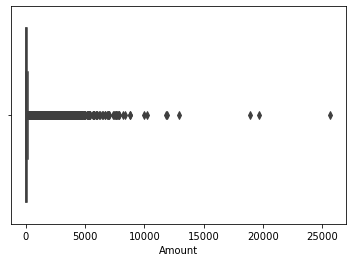

In [10]:
sns.boxplot(data=data, x='Amount')

In [11]:
data[['Amount']] = MinMaxScaler().fit_transform(data[['Amount']])

##  Exploration Data Analysis

This dataset is imbalanced. There are 284315 indicated as normal transactions and only 492 fraudulent transactions.

In [12]:
from collections import Counter
Counter(data.Class)

Counter({0: 284315, 1: 492})

<AxesSubplot:>

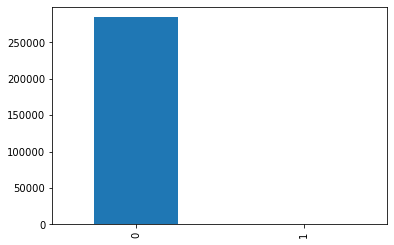

In [13]:
data['Class'].value_counts().plot(kind='bar')

The amount size did not show significant difference between the two class

<AxesSubplot:xlabel='Class', ylabel='Amount'>

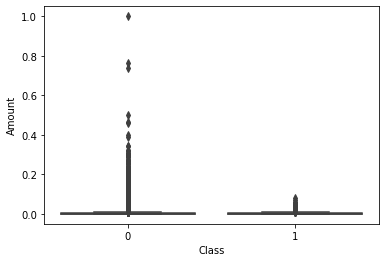

In [14]:
sns.boxplot(data=data, y='Amount', x='Class')

The elapsed time can not separate two different class

<AxesSubplot:xlabel='Class', ylabel='Time'>

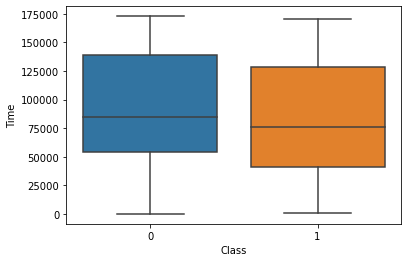

In [15]:
sns.boxplot(data=data, y='Time', x='Class')

### Inference features

The result shows that the p-value of V12 and V24 is higher than 0.05, indicating that these two features did not show significant differences between these two classes. Hence, this dataset can remove V12 and V24.

In [16]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
X = data.loc[:, data.columns != "Class"]
y = data.loc[:, data.columns == "Class"]
glm_binom = sm.GLM(y, X, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:               284807
Model:                            GLM   Df Residuals:                   284777
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2792.0
Date:                Sat, 12 Feb 2022   Deviance:                       5583.9
Time:                        14:11:41   Pearson chi2:                 9.01e+15
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time       -9.112e-05   1.63e-06    -55.892      0.0

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

## Feature Selection
Using Lasso Regression to remove not siginificant features


In [20]:
features = data.iloc[:, data.columns != 'Class']
label = data.iloc[:, data.columns == "Class"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

## Seperate features and labal from dataset

In [22]:
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(LogisticRegression(penalty='l2', max_iter=100000))
sel_.fit(X_train, y_train)

C:\Users\MaxKuan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SelectFromModel(estimator=LogisticRegression(max_iter=100000))

In [23]:
sel_.get_support()

array([False,  True, False,  True,  True, False, False, False, False,
        True, False,  True, False,  True,  True,  True, False,  True,
       False, False, False, False,  True, False, False,  True, False,
        True, False, False])

In [24]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 30
selected features: 12


In [25]:
reg_features = X_train.columns[(sel_.get_support() == True).tolist()]
reg_features

Index(['V1', 'V3', 'V4', 'V9', 'V11', 'V13', 'V14', 'V15', 'V17', 'V22', 'V25',
       'V27'],
      dtype='object')

In [26]:
features = data[reg_features]
label = data['Class']

# Make Hypothesis
We need to ensure that all potential fraudulent transactions are detected, even though they might be false alarms for fraud detection. Hence, focusing on recall rate is more important than accuracy for metric analysis. 

# Use Machine Learning to Predict Fraudulent Transaction

### Create Baseline Model - Logistic Regression

In [27]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\MaxKuan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Logistic Regression model cannot successfully identify fraudulent and normal transaction. The recall for this model is 0.551, which means for true fraudulent transcation, the model can only predict 56 percent of them correctly. This model will lead to financal burden for the company. 

In [28]:
print(f"""
Model Evaluation
-------------------
Accuracy - {accuracy_score(y_test, y_pred)}
Precision - {precision_score(y_test, y_pred)}
Recall - {recall_score(y_test, y_pred)}
F1 Score - {f1_score(y_test, y_pred)}
Confusion Matrix [TrueNeg, FalsePos, FalseNeg, TruePos] - {confusion_matrix(y_test,y_pred).ravel()}
""")


Model Evaluation
-------------------
Accuracy - 0.9990695551420246
Precision - 0.8461538461538461
Recall - 0.5612244897959183
F1 Score - 0.6748466257668712
Confusion Matrix [TrueNeg, FalsePos, FalseNeg, TruePos] - [56854    10    43    55]



### Applying RandomForest Classifier
As a result, the False Negative had siginificant decrease from 43 to 23, the recall rate had increase from 56% to 76% and the F1 indicated the Random Forest Classifier is a better model compare to Logistic Regression.

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"""
Model Evaluation
-------------------
Accuracy - {accuracy_score(y_test, y_pred)}
Precision - {precision_score(y_test, y_pred)}
Recall - {recall_score(y_test, y_pred)}
F1 Score - {f1_score(y_test, y_pred)}
Confusion Matrix [TrueNeg, FalsePos, FalseNeg, TruePos] - {confusion_matrix(y_test,y_pred).ravel()}
""")

C:\Users\MaxKuan\AppData\Local\Temp/ipykernel_11464/1683846491.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)



Model Evaluation
-------------------
Accuracy - 0.9995611109160493
Precision - 0.974025974025974
Recall - 0.7653061224489796
F1 Score - 0.8571428571428571
Confusion Matrix [TrueNeg, FalsePos, FalseNeg, TruePos] - [56862     2    23    75]



## Cross Validation
Applying cross validation to random forest classifier. The average recall rate after 3 cross validation is around  0.756 and F1 score is 0.83

In [31]:
from sklearn.model_selection import cross_validate 
from sklearn import metrics
model = RandomForestClassifier()
scores = cross_validate (model, X_train, np.array(y_train).ravel(), cv=3, scoring=('recall', 'f1'))

In [34]:
print(f"""
Recall: {np.mean(scores['test_recall'])}
F1: {np.mean(scores['test_f1'])}
""")


Recall: 0.7564577068393863
F1: 0.8377525958806747



## Conclusion
In conclusion, the best metrics for credit card fraud detection are recall and F1 for evaluating the model instead of accuracy. Random forest classifier had a higher recall and F1 score than Logistic Regression. Besides, using lasso regularization to remove not significant features did not improve the model. Hence, the best model for this dataset is using Random Forest Classifier.